In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns

<b><u><html>Dataset from mitu.co.in/dataset

<b><u>MSSpamCollection.txt

In [2]:
df= pd.read_table('SMSSpamCollection.txt',
                  names=['label','text'])

In [3]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
x = df['text']

y = df['label']

<AxesSubplot: xlabel='label', ylabel='count'>

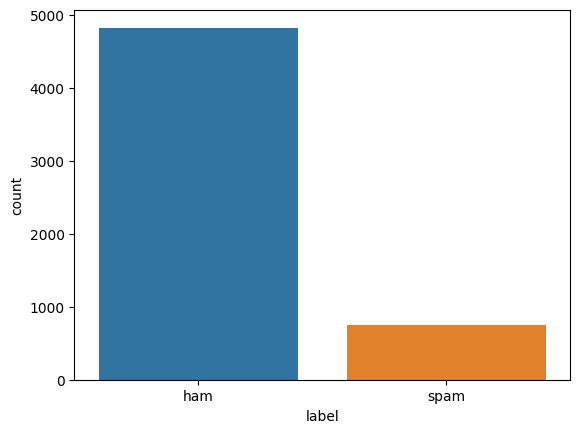

In [5]:
sns.countplot(x=y)

In [6]:
y.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [7]:
x[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [8]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.corpus import stopwords

swords =stopwords.words('english')

In [9]:
sent = 'Hello friends! How are you? Enjoy learning Python Programming.'

<b><u>tokenize the data 

In [10]:
words = word_tokenize(sent)
words

['Hello',
 'friends',
 '!',
 'How',
 'are',
 'you',
 '?',
 'Enjoy',
 'learning',
 'Python',
 'Programming',
 '.']

<b><u>remove punctuation symbols

In [11]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
tokens = [x for x in words if x not in string.punctuation]

In [13]:
tokens

['Hello',
 'friends',
 'How',
 'are',
 'you',
 'Enjoy',
 'learning',
 'Python',
 'Programming']

<b><u>Remove stopwords

In [14]:
cleant = [x.lower() for x in tokens if x.lower() not in swords]

In [15]:
cleant

['hello', 'friends', 'enjoy', 'learning', 'python', 'programming']

<b><u>Remove Stem

In [16]:
ps = PorterStemmer()
cleans = [ps.stem(x) for x in cleant]
cleans

['hello', 'friend', 'enjoy', 'learn', 'python', 'program']

<b><u>Creating function to clean the sentance

In [17]:
def clean_text(sent):
    
    # tokenize the sentance
    words = word_tokenize(sent)
    
    # removing punctuation
    tokens = [x for x in words if x not in string.punctuation]
    
    # removing stopwords
    cleant = [x.lower() for x in tokens if x.lower() not in swords]
    
    # removing stem
    cleans = [ps.stem(x) for x in cleant]
    
    return cleans    

In [18]:
sent1 = 'Hello friends! How are you? Enjoy learning Python Programming.'

In [19]:
clean_text(sent1)

['hello', 'friend', 'enjoy', 'learn', 'python', 'program']

In [20]:
sent2 = 'It was a difficult task, but he completed it in time.'
clean_text(sent2)

['difficult', 'task', 'complet', 'time']

<b><u>applying on data series

In [21]:
x.apply(lambda x: clean_text(x))

0       [go, jurong, point, crazi, .., avail, bugi, n,...
1                  [ok, lar, ..., joke, wif, u, oni, ...]
2       [free, entri, 2, wkli, comp, win, fa, cup, fin...
3       [u, dun, say, earli, hor, ..., u, c, alreadi, ...
4       [nah, n't, think, goe, usf, live, around, though]
                              ...                        
5567    [2nd, time, tri, 2, contact, u., u, £750, poun...
5568                       [ü, b, go, esplanad, fr, home]
5569                           [piti, mood, ..., suggest]
5570    [guy, bitch, act, like, 'd, interest, buy, som...
5571                                   [rofl, true, name]
Name: text, Length: 5572, dtype: object

<b><u>TF-TDF Vectorization

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
tfidf=TfidfVectorizer(analyzer=clean_text)

In [24]:
x_vect = tfidf.fit_transform(x)

In [25]:
tfidf.get_feature_names_out()

array(["''", "'an", "'anyth", ..., '…thank', '〨ud', '鈥┾'], dtype=object)

In [26]:
x_vect

<5572x7944 sparse matrix of type '<class 'numpy.float64'>'
	with 52448 stored elements in Compressed Sparse Row format>

In [27]:
df=pd.DataFrame(x_vect.toarray(),
               columns = tfidf.get_feature_names_out())

In [28]:
df.columns

Index(['''', ''an', ''anyth', ''comfort', ''d', ''doctor', ''heart', ''help',
       ''hex', ''hw',
       ...
       'é', 'ü', '–', '‘', '’', '“', '…', '…thank', '〨ud', '鈥┾'],
      dtype='object', length=7944)

<b><u>Train Test Splits

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x_vect, y,
                                                   random_state=0,
                                                   test_size=0.25)

<b><u>Import the classifier SVM/SVC <i>kernel = 'linear'

In [31]:
from sklearn.svm import SVC

In [32]:
clf = SVC(kernel = 'linear')

In [33]:
# train
clf.fit(X_train,y_train)

SVC(kernel='linear')

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [35]:
y_pred=clf.predict(X_test)

In [36]:
accuracy_score(y_test,y_pred)

0.9834888729361091

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       0.99      0.88      0.93       185

    accuracy                           0.98      1393
   macro avg       0.99      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



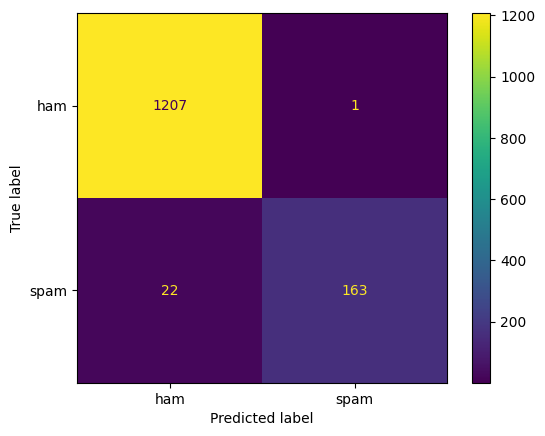

In [38]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

<b><u>Import the Sample file and do prediction

In [57]:
X_sample= pd.read_table('sample.csv',header=None)

In [58]:
X_sample = X_sample[0]

In [59]:
x_vect_sample = tfidf.transform(X_sample)

In [60]:
y_pred_sample=clf.predict(x_vect_sample)

In [61]:
y_pred_sample

array(['ham', 'spam', 'ham'], dtype=object)

### <b><u>Save the object of classifier and vectorier

In [62]:
import joblib

In [64]:
joblib.dump(clf,'classfier_26.model')

['classfier_26.model']

In [65]:
joblib.dump(tfidf,'tfidf_26.model')

['tfidf_26.model']

### <b><u> Creating UI using tkinter for above model

In [66]:
from tkinter import *

In [67]:
model = joblib.load('classfier_26.model')

In [68]:
tfidf = joblib.load('tfidf_26.model')

In [71]:
top = Tk()

top.title('My Program')
top.geometry("500x350")

def show():
    
    # converting text to str type
    msg = str(text.get())
    
    # predict on model
    pred = model.predict(tfidf.transform([msg]))
    
    # printing prediction on UI
    Label(text = f'Prediction is: {pred[0]}').place(x=150,y=200)


text = StringVar()  # intvar ,doublevar, stringvar

l = Label(text = "Enter Message: ").place(x=100,y=100)
e = Entry(textvariable=text).place(x=200,y=100)
b = Button(text = "Submit", command=show).place(x=180,y=150)

top.mainloop()